In [70]:
'''imports'''

'''basic imports'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''import geopandas as gp'''
import scipy
import sparse
from scipy.sparse import csr_matrix

'''dataframe handling'''
'''import pandas as pd'''
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import dask_ml.cluster
import dask_ml.preprocessing
from dask_ml.preprocessing import OneHotEncoder
import joblib

import datetime as date

'''learning'''
import sklearn
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [71]:
'''Lists'''

'''Genera, species library'''
aedes = ['dorsalis', 'melanimon', 'nigromaculis', 'sierrensis', 'squamiger', 'vexans', 'washinoi']
anopheles = ['franciscanus', 'freeborni', 'occidentalis', 'punctipennis']
culex = ['apicalis', 'erythrothorax', 'pipiens', 'restuans', 'stigmatosoma', 'tarsalis']
culiseta = ['incidens', 'inornata', 'particeps']
genera = [aedes, anopheles, culex, culiseta]

'''CSV / dataframe column names'''
allcols=['agency_collection_num','collection_id','code','longitude','latitude','collection_date','aedes_dorsalis_males',
         'aedes_dorsalis_females-mixed','aedes_melanimon_males','aedes_melanimon_females-mixed','aedes_nigromaculis_males',
         'aedes_nigromaculis_females-mixed','aedes_sierrensis_males','aedes_sierrensis_females-mixed',
         'aedes_squamiger_males','aedes_squamiger_females-mixed','aedes_vexans_males','aedes_vexans_females-mixed',
         'aedes_washinoi_males','aedes_washinoi_females-mixed','anopheles_franciscanus_males',
         'anopheles_franciscanus_females-mixed','anopheles_freeborni_males','anopheles_freeborni_females-mixed',
         'anopheles_occidentalis_males','anopheles_occidentalis_females-mixed','anopheles_punctipennis_males', 
         'anopheles_punctipennis_females-mixed','culex_apicalis_males','culex_apicalis_females-mixed',
         'culex_erythrothorax_males','culex_erythrothorax_females-mixed','culex_pipiens_males',
         'culex_pipiens_females-mixed','culex_restuans_males','culex_restuans_females-mixed','culex_stigmatosoma_males',
         'culex_stigmatosoma_females-mixed','culex_tarsalis_males','culex_tarsalis_females-mixed','culiseta_incidens_males',
         'culiseta_incidens_females-mixed','culiseta_inornata_males','culiseta_inornata_females-mixed',
         'culiseta_particeps_males','culiseta_particeps_females-mixed']

rawabundcols = ['aedes_dorsalis_males','aedes_dorsalis_females-mixed','aedes_melanimon_males','aedes_melanimon_females-mixed',
             'aedes_nigromaculis_males','aedes_nigromaculis_females-mixed','aedes_sierrensis_males',
             'aedes_sierrensis_females-mixed','aedes_squamiger_males','aedes_squamiger_females-mixed','aedes_vexans_males',
             'aedes_vexans_females-mixed','aedes_washinoi_males','aedes_washinoi_females-mixed','anopheles_franciscanus_males',
             'anopheles_franciscanus_females-mixed','anopheles_freeborni_males','anopheles_freeborni_females-mixed',
             'anopheles_occidentalis_males','anopheles_occidentalis_females-mixed','anopheles_punctipennis_males',
             'anopheles_punctipennis_females-mixed','culex_apicalis_males','culex_apicalis_females-mixed',
             'culex_erythrothorax_males','culex_erythrothorax_females-mixed','culex_pipiens_males',
             'culex_pipiens_females-mixed','culex_restuans_males','culex_restuans_females-mixed','culex_stigmatosoma_males',
             'culex_stigmatosoma_females-mixed','culex_tarsalis_males','culex_tarsalis_females-mixed','culiseta_incidens_males',
             'culiseta_incidens_females-mixed','culiseta_inornata_males','culiseta_inornata_females-mixed',
             'culiseta_particeps_males','culiseta_particeps_females-mixed']

'''column names of findata'''
fincols = ['agency_collection_num','collection_id','code','longitude','latitude','collection_date','dorsalis','melanimon',
           'nigromaculis','sierrensis','squamiger','vexans','washinoi','franciscanus','freeborni','occidentalis','punctipennis',
           'apicalis','erythrothorax','pipiens','restuans','stigmatosoma','tarsalis','incidens','inornata','particeps']

In [89]:
'''data management'''
'''findata is the dataframe containing all processed abundance data with supplemental info needed later'''
'''testdata is the processed abundance dataframe to be used in the clustering'''


supportcols = ['collection_id','code','site_name','longitude','latitude','collection_date', 'total']

findata = dd.read_csv (r'C:\Users\AndrewBurns\documents\smallabundance1622.csv', usecols = supportcols, parse_dates=['collection_date'])


proabundcols = ['dorsalis', 'melanimon', 'nigromaculis', 'sierrensis', 'squamiger','vexans', 'washinoi', 'franciscanus', 
                'freeborni', 'occidentalis', 'punctipennis', 'apicalis', 'erythrothorax','pipiens','restuans', 'stigmatosoma', 
                'tarsalis', 'incidens', 'inornata', 'particeps']


abunddata = dd.read_csv (r'C:\Users\AndrewBurns\documents\smallabundance1622.csv', usecols = rawabundcols,dtype = {'aedes_dorsalis_males':np.int8,'aedes_dorsalis_females-mixed':np.int8,'aedes_melanimon_males':np.int8,'aedes_melanimon_females-mixed':np.int8,
             'aedes_nigromaculis_males':np.int8,'aedes_nigromaculis_females-mixed':np.int8,'aedes_sierrensis_males':np.int8,
             'aedes_sierrensis_females-mixed':np.int8,'aedes_squamiger_males':np.int8,'aedes_squamiger_females-mixed':np.int8,'aedes_vexans_males':np.int8,
             'aedes_vexans_females-mixed':np.int8,'aedes_washinoi_males':np.int8,'aedes_washinoi_females-mixed':np.int8,'anopheles_franciscanus_males':np.int8,
             'anopheles_franciscanus_females-mixed':np.int8,'anopheles_freeborni_males':np.int8,'anopheles_freeborni_females-mixed':np.int8,
             'anopheles_occidentalis_males':np.int8,'anopheles_occidentalis_females-mixed':np.int8,'anopheles_punctipennis_males':np.int8,
             'anopheles_punctipennis_females-mixed':np.int8,'culex_apicalis_males':np.int8,'culex_apicalis_females-mixed':np.int8,
             'culex_erythrothorax_males':np.int8,'culex_erythrothorax_females-mixed':np.int8,'culex_pipiens_males':np.int8,
             'culex_pipiens_females-mixed':np.int8,'culex_restuans_males':np.int8,'culex_restuans_females-mixed':np.int8,'culex_stigmatosoma_males':np.int8,
             'culex_stigmatosoma_females-mixed':np.int8,'culex_tarsalis_males':np.int8,'culex_tarsalis_females-mixed':np.int8,'culiseta_incidens_males':np.int8,
             'culiseta_incidens_females-mixed':np.int8,'culiseta_inornata_males':np.int8,'culiseta_inornata_females-mixed':np.int8,
             'culiseta_particeps_males':np.int8,'culiseta_particeps_females-mixed':np.int8}, low_memory=False)

testdata = dd.read_csv (r'C:\Users\AndrewBurns\documents\smallabundance1622.csv', usecols = ['total'], dtype = {'collection_id':np.int8})

for x in proabundcols: 
    sera = abunddata.iloc[:,2*proabundcols.index(x)]
    serb = abunddata.iloc[:,(2*proabundcols.index(x))+1]
    serret = sera.add(serb, fill_value = 0)
    findata[x] = serret 
    testdata[x] = serret



<AxesSubplot:xlabel='collection_id', ylabel='total'>

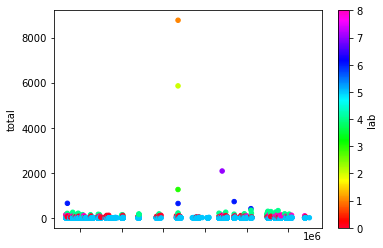

In [94]:
'''clustering and display'''

holder = testdata.compute()
kmeans = sklearn.cluster.KMeans(n_clusters=9)
label = kmeans.fit(holder)
holder['lab'] = label.labels_
holder['collection_id'] = findata['collection_id'].compute()
holder.plot.scatter('collection_id','total', c='lab', colormap='gist_rainbow')

C:\Users\AndrewBurns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


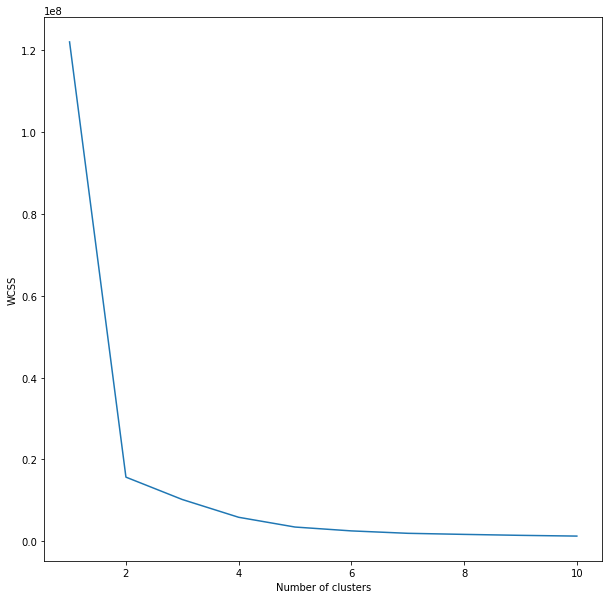

In [98]:
'''numcluster finder'''
holder = testdata.compute()
kmeans = sklearn.cluster.KMeans(n_clusters=9)
label = kmeans.fit(holder)
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(holder)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()